In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

In [2]:
file_path = r"S:\Linear Regression Project\Flight Price Prediction\Data\train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Delhi,Cochin,19:10:00,04:25:00,1995,2.0,In-flight meal not included,8834
1,Jet Airways,2019-03-06,Banglore,New Delhi,08:00:00,07:40:00,1420,1.0,No Info,14815
2,Jet Airways,2019-05-21,Kolkata,Banglore,17:00:00,14:25:00,1285,1.0,No Info,11467
3,Jet Airways,2019-05-21,Kolkata,Banglore,20:00:00,09:20:00,800,1.0,No Info,14781
4,Multiple Carriers,2019-06-27,Delhi,Cochin,09:00:00,21:00:00,720,1.0,No Info,7408
...,...,...,...,...,...,...,...,...,...,...
635,Vistara,2019-03-24,Banglore,New Delhi,07:00:00,09:40:00,160,0.0,No Info,4878
636,Air Asia,2019-06-15,Delhi,Cochin,07:55:00,22:25:00,870,1.0,No Info,6253
637,Air India,2019-06-24,Delhi,Cochin,10:00:00,19:15:00,555,1.0,No Info,9194
638,Jet Airways,2019-06-03,Delhi,Cochin,11:30:00,19:00:00,450,1.0,In-flight meal not included,10262


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True)
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [6]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [8]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-27 19:10:00,2024-07-27 04:25:00,1995,2.0,In-flight meal not included,8834
1,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-27 08:00:00,2024-07-27 07:40:00,1420,1.0,No Info,14815
2,Jet Airways,2019-05-21,Kolkata,Banglore,2024-07-27 17:00:00,2024-07-27 14:25:00,1285,1.0,No Info,11467
3,Jet Airways,2019-05-21,Kolkata,Banglore,2024-07-27 20:00:00,2024-07-27 09:20:00,800,1.0,No Info,14781
4,Multiple Carriers,2019-06-27,Delhi,Cochin,2024-07-27 09:00:00,2024-07-27 21:00:00,720,1.0,No Info,7408


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [11]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,652.390625,0.862500,9106.750000
std,502.069103,0.675875,4365.055287
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5292.750000
50%,535.000000,1.000000,8564.000000
75%,932.500000,1.000000,12249.750000
max,2280.000000,3.000000,31945.000000


In [13]:
(
    train.assign(
        total_stops = train["total_stops"].astype(object)
    ).describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,226,267,267,342.0,506


## High Level Analysis of Missing Values

In [14]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## Analysis of Outliers

In [16]:
forest = IsolationForest()

In [17]:
(
    train
    .assign(outlier = forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-27 19:10:00,2024-07-27 04:25:00,1995,2.0,In-flight meal not included,8834,-1
1,Jet Airways,2019-03-06,Banglore,New Delhi,2024-07-27 08:00:00,2024-07-27 07:40:00,1420,1.0,No Info,14815,-1
2,Jet Airways,2019-05-21,Kolkata,Banglore,2024-07-27 17:00:00,2024-07-27 14:25:00,1285,1.0,No Info,11467,-1
5,Air India,2019-03-21,Delhi,Cochin,2024-07-27 06:05:00,2024-07-27 09:25:00,1640,1.0,No Info,7532,-1
6,Indigo,2019-06-24,Mumbai,Hyderabad,2024-07-27 19:05:00,2024-07-27 20:35:00,90,0.0,No Info,2754,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Air India,2019-05-18,Kolkata,Banglore,2024-07-27 08:20:00,2024-07-27 18:30:00,610,2.0,No Info,10907,-1
630,Indigo,2019-05-09,Mumbai,Hyderabad,2024-07-27 02:35:00,2024-07-27 04:05:00,90,0.0,No Info,2754,-1
632,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-27 16:00:00,2024-07-27 19:45:00,1665,1.0,No Info,17024,-1
633,Air India,2019-06-09,Delhi,Cochin,2024-07-27 09:45:00,2024-07-27 09:25:00,1420,2.0,No Info,11185,-1


## Pair Plots

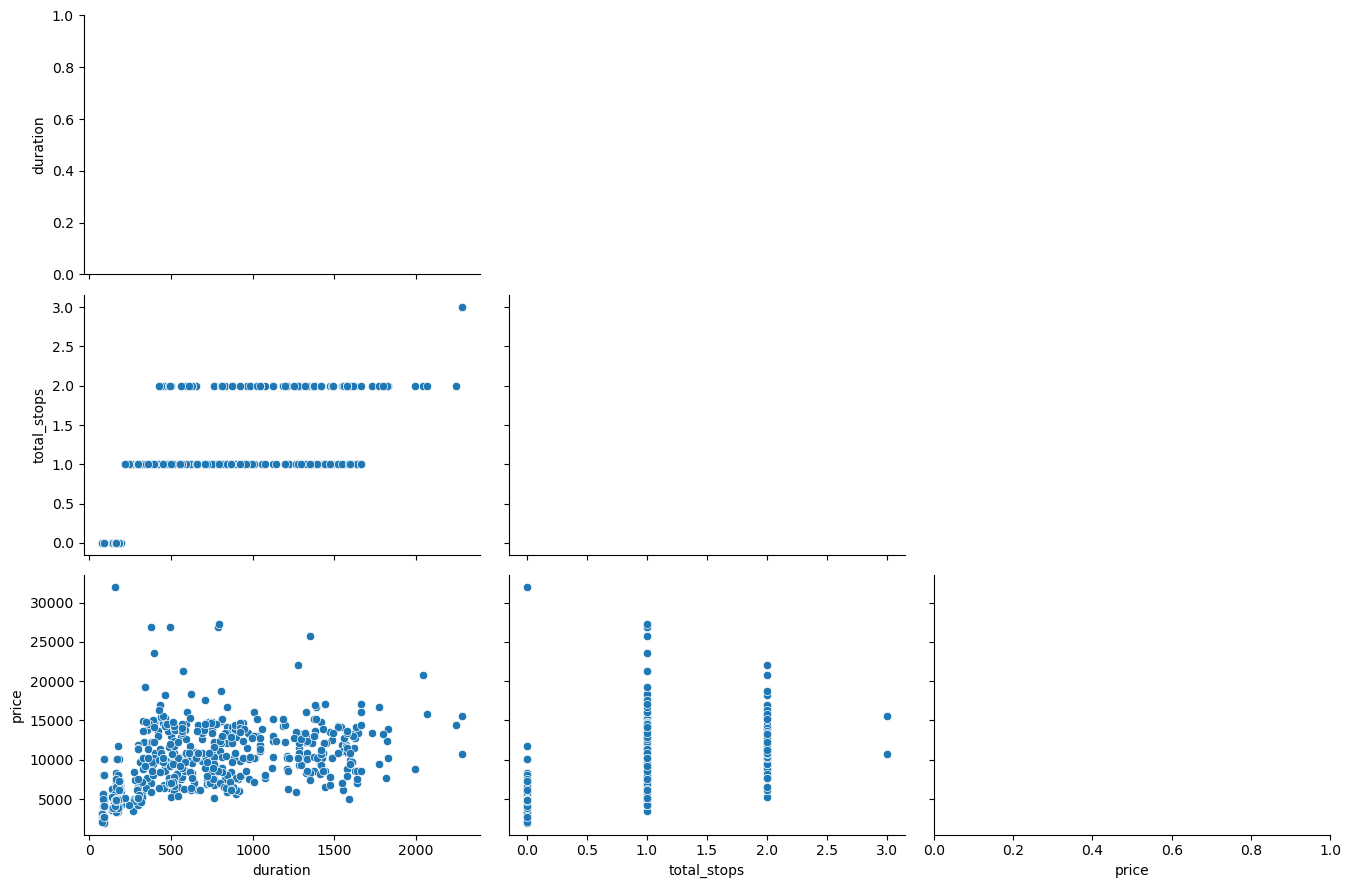

In [19]:
eda_helper_functions.pair_plots(train)

## Correlation Analysis

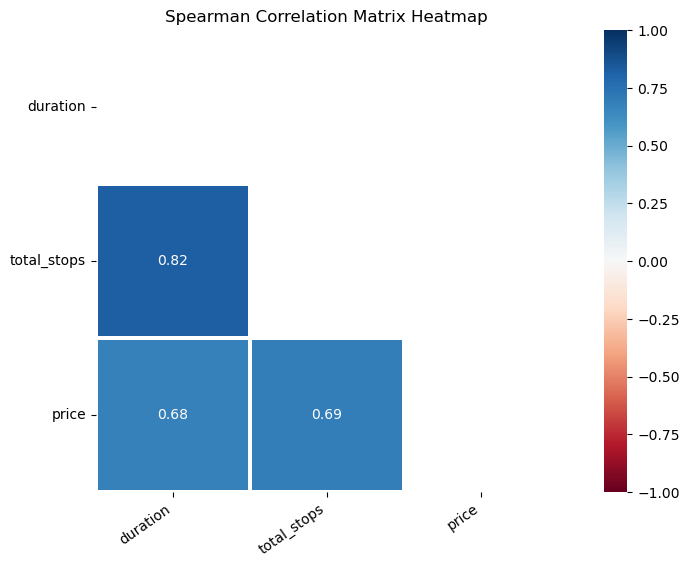

In [24]:
eda_helper_functions.correlation_heatmap(train)